## In this notebook, we will explore feature selection techniques.

We have following feature selection methods based on problem statement.
We have 3 categories of Feature selection

## 1. Filter Methods
   These Methods are faster and less computationally expensive compared to wrapper methods but these methods does not remove multicollinearity.
   
   * Correlation
   * Variance Threshold
   * Univariate
     * Chi-square
     * Anova
     * Information Gain
     
## 2. Wrapper Methods
### These are effective compared to filter Methods
   * Recursive Feature Elimination
   
## 3. Embedded Methods

### Embedded feature selection techniques are powerful for automatically identifying and selecting relevant features while training models. They are particularly beneficial in high-dimensional datasets where manual feature selection may not be feasible

  * L1 (Lasso Regularization)
    * It adds penalty to Loss function which can reduce coefficients to Zero, effectively making feature selection. It used when we suspect many features are irrelevant.
  * Variable Importance Feature Selection (From Tree-Based Models eg: Random Forest, Gradient Boosting)
    * Decision tree algorithms can provide feature importance scores based on how useful each feature is for splitting nodes and these methods are useful for complex datasets.

## Advantages:
### Efficiency: 
    * They are typically faster than wrapper methods since they do not require training multiple models.
### Reduced Overfitting: 
    * By performing feature selection during model training, they help mitigate overfitting.

 
features.
   
#### a. Correlation
        We will check correlation for all features including target and figure how much each variable is correlated between them.
        If its having more correlation means then those features are dependent each other so we should drop either one feature in such cases as we want all independent features for Model development.
### Correlation Coefficient: 
        For continuous variables, you might use Pearson correlation. For categorical variables, you could use point biserial correlation or chi-squared tests.

### Visualization:
        Tools like scatter plots for continuous variables or box plots for categorical variables can provide insights into the relationships.



### b. Variance Threshold

        Based on Variance, we can decide the data is constant or varying. Data is not varying much means, data has unique values.
        For eg: We have seen in loan data set, loan term: 36. 
Python, by default will use variance = 0
        , it will drop those features which are having low variance. Variance threshold is hyper parameter
        , we can keep threshold as any value based on internal team discussio 
 We will drop those features, which are having <= threshold value



## Essentials of Feature Selection: Key Strategies and Considerations
When working on a machine learning project, the type of problem (classification vs. regression) and the characteristics of your data (numerical, categorical, textual) significantly influence the choice of feature selection methods. Achieving a balance between model interpretability and computational efficiency is vital for selecting the most effective approach.



# Recommended Feature Selection Techniques

 
* Correlation Analysis & Information Gain

    Best for projects focusing on interpretability and numerical features, offering insights with minimal computational demand.

## Filter Methods (e.g., Variance Threshold): 
    Ideal for scenarios where computational efficiency is a priority, quickly reducing feature dimensions.

### Wrapper Methods (e.g., Recursive Feature Elimination - RFE): 
    Suited for classification tasks with mixed data types, enhancing feature sets despite higher computational costs.

## Embedded Methods (e.g., L1 Regularization - LASSO): 
    Optimal for regression tasks, striking a balance between performance and interpretability by penalizing less significant features.


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:


cancer_df = pd.read_csv(r"C:\Users\Venky\Desktop\DS_Material\Data_Files\Cancer_Data.csv")
cancer_df.head(4)

In [ ]:
# Drop unwanted cols
unwanted_cols = ['id','Unnamed: 32']
cancer_df_f  = cancer_df.drop(unwanted_cols,axis=1)

In [ ]:
cancer_df_f.head(4)

In [ ]:
X = cancer_df_f.drop('diagnosis',axis=1)
y = cancer_df_f['diagnosis']

In [ ]:
X.shape,y.shape

In [ ]:
y.value_counts()

In [ ]:
a = cancer_df_f.diagnosis

In [ ]:
ax = sns.countplot(x='diagnosis',data=cancer_df_f,orient='h')      # M = 212, B = 357
ax.set_xlabel("diagnosis")
ax.set_ylabel("Count")
ax.set_title("Count of Cancer Diagnosis")
y = cancer_df_f['diagnosis']


B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [ ]:

#f,ax = plt.subplots(figsize=(14,14))
#plt.title("Heatmap Plot for Cancer")
#sns.heatmap(X.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

X.corr()

# 1. feature selection using Correlation and then prediction using RandomForest Classifier Model



In [162]:
from sklearn.datasets import load_breast_cancer
bc_data = load_breast_cancer()  # Load Breast cancer data from sklearn
X = pd.DataFrame(bc_data.data,columns=bc_data.feature_names)
y = pd.Series(bc_data.target) # Change to a Series for easier correlation calculation
#columns=['Diagnosis'])

# Calculate absolute correlation values
corr_Val = X.apply(lambda feature: np.abs(np.corrcoef(feature,y)[0,1]))
sort_val = corr_Val.sort_values(ascending=False)
sort_val
bc_data


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [201]:
# Picking top 10 highest correlation value features 

k =10

selected_features = sort_val.index[:10]
#print( sort_val.index[:10])
selected_features

Index(['worst concave points', 'worst perimeter', 'mean concave points',
       'worst radius', 'mean perimeter', 'worst area', 'mean radius',
       'mean area', 'mean concavity', 'worst concavity'],
      dtype='object')


Index(['worst concave points', 'worst perimeter', 'mean concave points',
       'worst radius', 'mean perimeter', 'worst area', 'mean radius',
       'mean area', 'mean concavity', 'worst concavity'],
      dtype='object')

# Now lets do visualization with selected features using Heatmap

### Dark blue cells have high positive correlations, dark red cells have high negative correlations, and light-colored cells have nearly no correlation

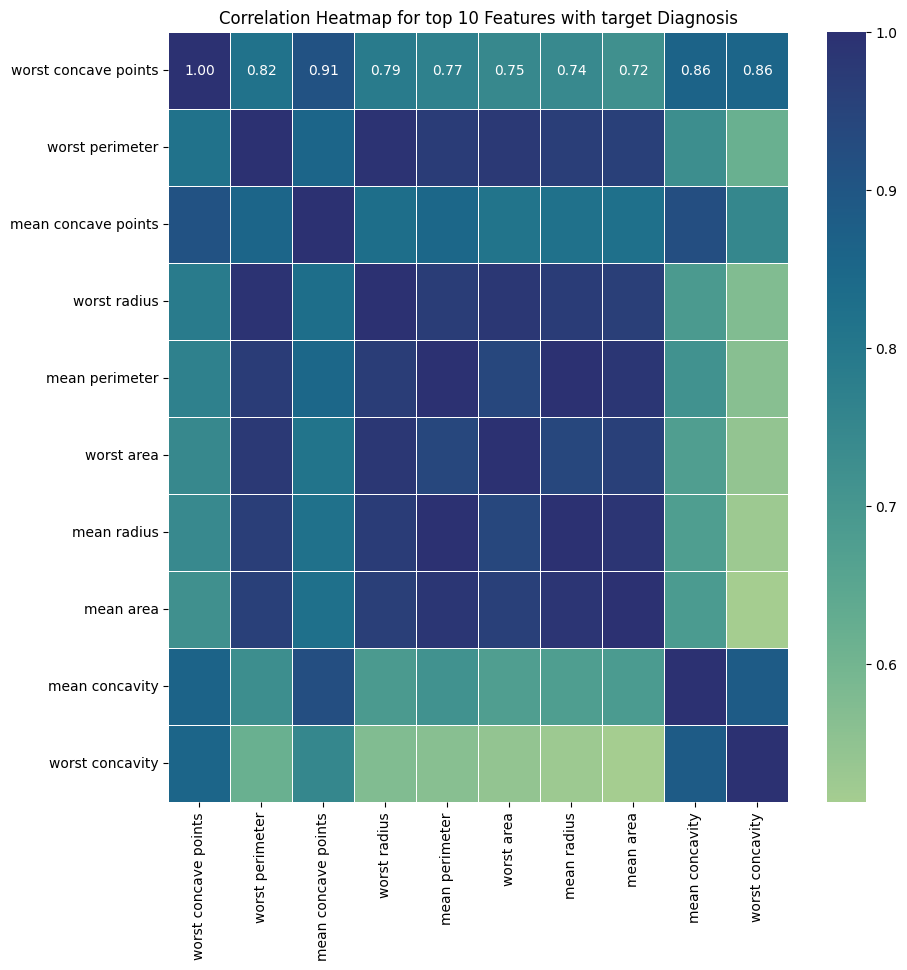

In [141]:
plt.figure(figsize=(10,10))
plt.title('Correlation Heatmap for top 10 Features with target Diagnosis')
sns.heatmap(X[selected_features].corr(),annot=True,cmap='crest',fmt='.2f',linewidths=0.5)
plt.show()



In [203]:
sort_val[:k]

worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
mean concavity          0.696360
worst concavity         0.659610
dtype: float64

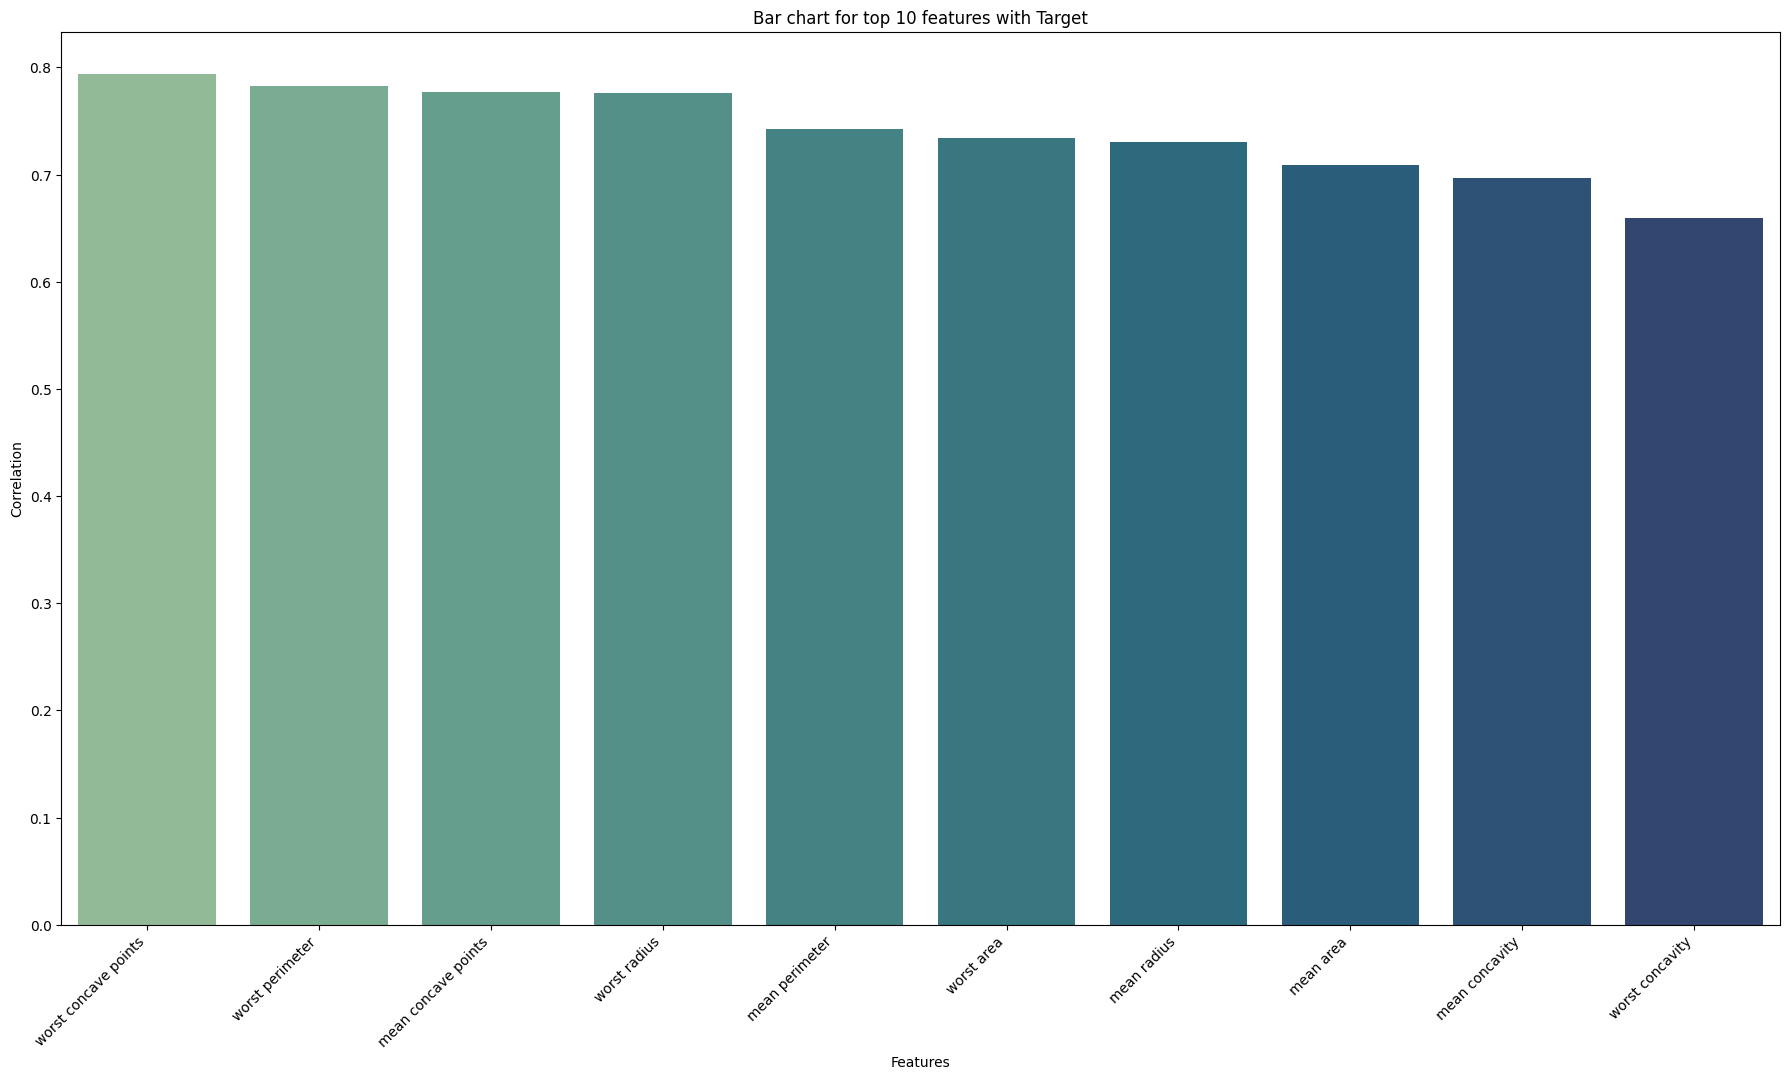

In [165]:
#Now visualize using barchat as well 

plt.figure(figsize=(18,10))
plt.title('Bar chart for top 10 features with Target')
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
sns.barplot(x=selected_features,y=sort_val[:k],palette='crest')
plt.show()

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score


X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

X_train.shape,y_train.shape,X_test.shape,y_test.shape                                        

((398, 30), (398,), (171, 30), (171,))

Accuracy: 0.96, Precision: 0.97
Confusion Matrix:
[[ 59   4]
 [  2 106]]


<Axes: >

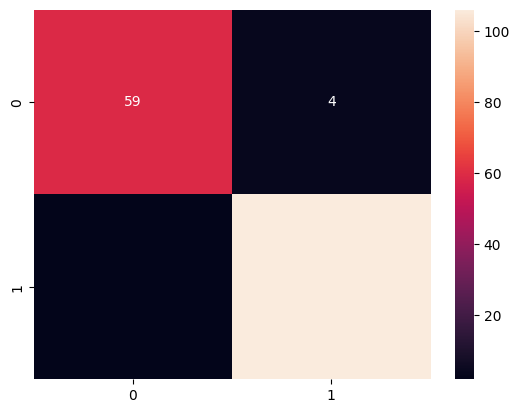

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(random_state=43)

# Fit the model on training data
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rfc = rfc.predict(X_test)

# Calculate accuracy and precision
acc = accuracy_score(y_test, y_pred_rfc)
prec = precision_score(y_test, y_pred_rfc,pos_label=0) #here we have "M or 0" as Positive class, similary we can calculate for "B or 1" as well

# Print accuracy and precision
print(f"Accuracy: {acc:.2f}, Precision: {prec:.2f}")

# Generate and display the confusion matrix
conf = confusion_matrix(y_test, y_pred_rfc)
print("Confusion Matrix:")
print(conf)

sns.heatmap(conf,annot=True,fmt='d')

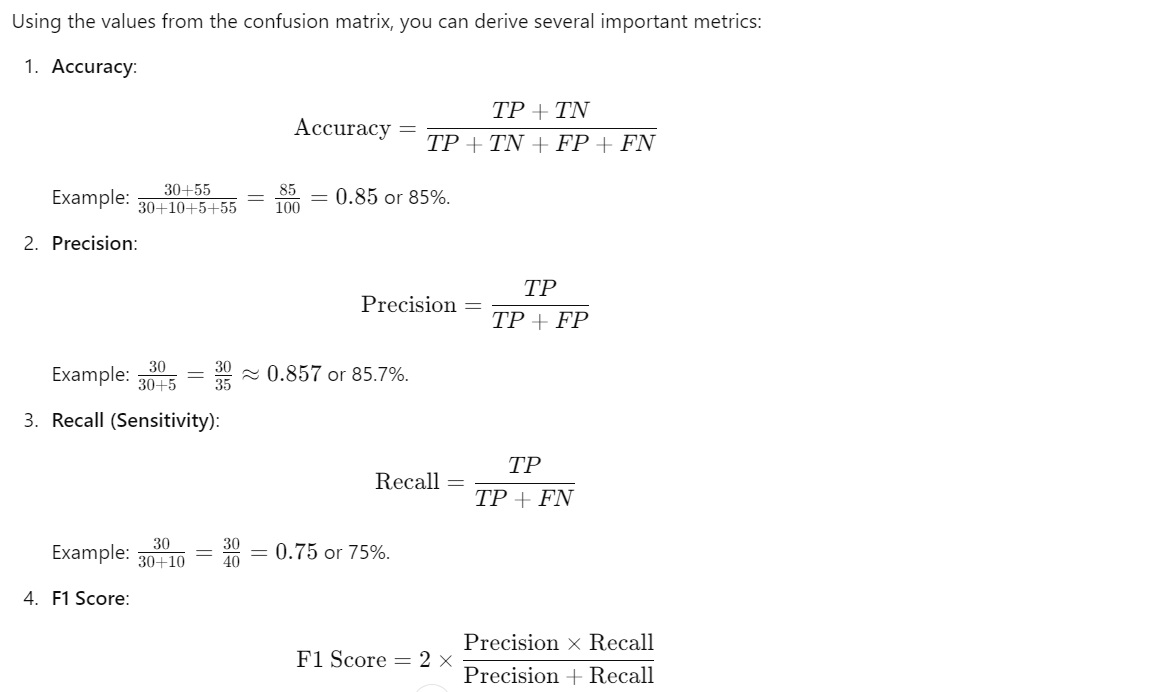

In [104]:
from IPython.display import Image,display

display(Image(filename=r"C:\Users\Venky\Desktop\DS_Material\Images\Metrics.jpg"))

# 2. feature selection using Univariate method and then prediction using RandomForest Classifier Model

## This method selects the features that have the strongest relationship with the target variable,
## based on statistical tests such as ANOVA or t-tests or chi square or Mutual Information


In [172]:
X.shape,y.shape
display(X.head(4))
display(y.head(4))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


0    0
1    0
2    0
3    0
dtype: int32

In [177]:
df = pd.DataFrame(X)
df['diagnosis']=y
display(df.head(4))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0


## Now lets select best features using Chi Square function
## SelectKBest removes all but the  highest scoring features

# These objects take as input a scoring function that returns univariate scores and p-values
# For regression: r_regression, f_regression, mutual_info_regression

# For classification: chi2, f_classif, mutual_info_classif

In [268]:


from sklearn.feature_selection import SelectKBest,chi2

k_best_features =10

selected = SelectKBest(score_func=chi2,k=k_best_features) #here i have used chi2 ,default is f_classif
uni_fit = selected.fit_transform(X,y)

print(X.columns)
print(f"original shape is {df.shape} and selected shape {uni_fit.shape}")

score = selected.scores_
sorted_indices = np.argsort(score)
print(f"sorted_indices is {sorted_indices}")

top_10_indices = sorted_indices[-k_best_features:]
print(f"top_10_indices is {top_10_indices}")

top_10_scores = score[top_10_indices]
print(f"top_10_scores are {top_10_scores} ")

selected_features_uv = df.columns[selected.get_support(indices=True)].tolist()
print(f"selected_features_uv is {selected_features_uv}")

selected_df = pd.DataFrame(data=top_10_scores,index=[selected_features_uv],columns=['Chi2-Score'])
display(selected_df)

# Another way to create dataframe is using Dictionary so both feature names and score are column names in this case 
# unlike above case score alone is column
selected_df_v1 = pd.DataFrame({'Feature':selected_features_uv,'Score':top_10_scores})
selected_df_v1

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'perimeter error', 'area error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area'],
      dtype='object')
original shape is (569, 31) and selected shape (569, 10)
sorted_indices is [1 7 4 0 6 2 8 5 3 9]
top_10_indices is [1 7 4 0 6 2 8 5 3 9]
top_10_scores are [9.38975081e+01 1.74449400e+02 2.50571896e+02 2.66104917e+02
 4.91689157e+02 2.01110286e+03 3.66503542e+03 8.75850471e+03
 5.39916559e+04 1.12598432e+05] 
selected_features_uv is ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']


,Chi2-Score
mean radius,93.897508
mean texture,174.449400
mean perimeter,250.571896
mean area,266.104917
mean smoothness,491.689157
mean compactness,2011.102864
mean concavity,3665.035416
mean concave points,8758.504705
mean symmetry,53991.655924
mean fractal dimension,112598.431564


,Feature,Score
0,mean radius,93.897508
1,mean texture,174.449400
2,mean perimeter,250.571896
3,mean area,266.104917
4,mean smoothness,491.689157
5,mean compactness,2011.102864
6,mean concavity,3665.035416
7,mean concave points,8758.504705
8,mean symmetry,53991.655924
9,mean fractal dimension,112598.431564


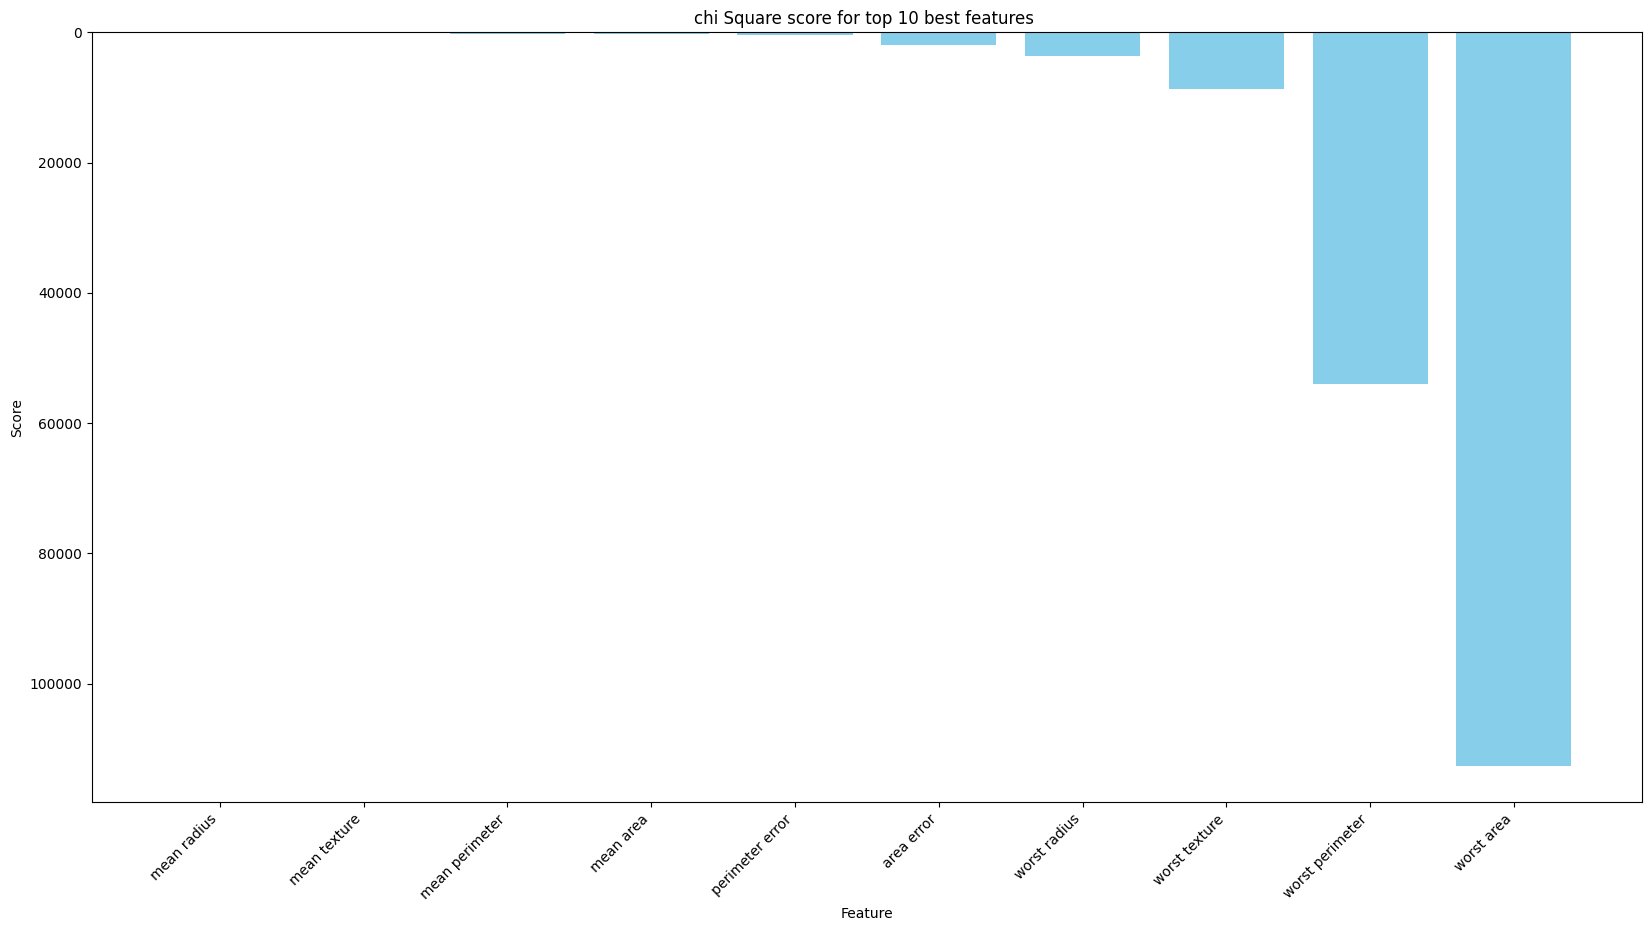

In [254]:
plt.figure(figsize=(20,10))

plt.title("chi Square score for top 10 best features ")
plt.xlabel("Feature")
plt.ylabel("Score")
# Method 1 using Seaborn with specified column names from data frame

#sns.barplot(x=selected_df_v1['Feature'],y=selected_df_v1['Score'],color='skyblue') 

# Method 2 using Seaborn with data frame 

#sns.barplot(x='Feature',y='Score',data=selected_df_v1,color='skyblue') 

# Method 3 using matplotlib
plt.bar(selected_df_v1['Feature'],selected_df_v1['Score'],color='skyblue')
plt.gca().invert_yaxis() # Invert y-axis to have the highest score on top
plt.xticks(rotation=45,ha='right')
plt.show()

In [260]:
X = X[selected_features_uv]
y = y
display(X.head(4))

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape )



,mean radius,mean texture,mean perimeter,mean area,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area
0,17.99,10.38,122.80,1001.0,8.589,153.40,25.38,17.33,184.60,2019.0
1,20.57,17.77,132.90,1326.0,3.398,74.08,24.99,23.41,158.80,1956.0
2,19.69,21.25,130.00,1203.0,4.585,94.03,23.57,25.53,152.50,1709.0
3,11.42,20.38,77.58,386.1,3.445,27.23,14.91,26.50,98.87,567.7


(398, 10) (398,) (171, 10) (171,)


accuracy is 0.9649122807017544 and precision is 0.958904109589041 and Recall is 0.9859154929577465


array([[40,  3],
       [ 1, 70]], dtype=int64)

<Axes: >

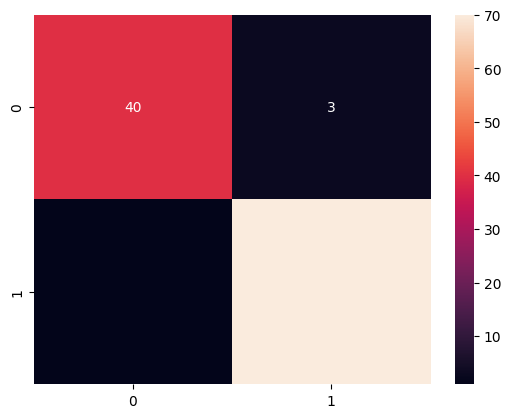

In [282]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

rfc_uv = RandomForestClassifier(random_state=42)
rfc_uv.fit(X_train,y_train)
y_pred_uv = rfc_uv.predict(X_test)

print(f"accuracy is {accuracy_score(y_test,y_pred_uv)} and precision is {precision_score(y_test,y_pred_uv)} and Recall is {recall_score(y_test,y_pred_uv)}")

conf = confusion_matrix(y_test,y_pred_uv)
display(conf)

sns.heatmap(conf,annot=True)

# Everything in single cell about Univariate + RandomForest Classifier Model

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']
Accuracy: 0.95
Precision: 0.93, Recall: 0.99
Confusion Matrix:
[[38  5]
 [ 1 70]]


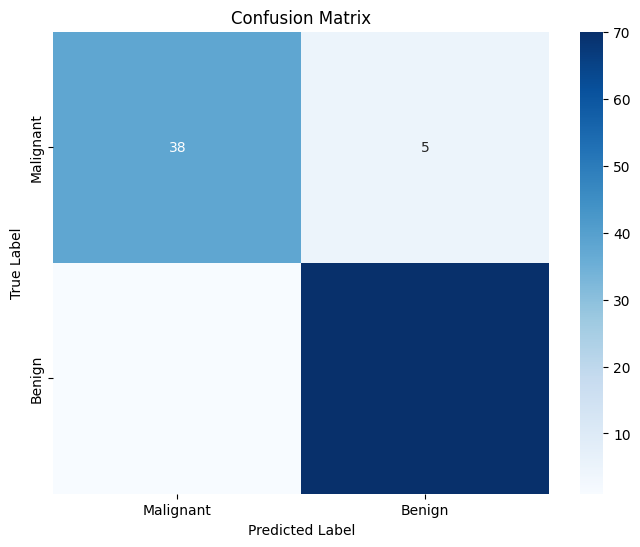

In [275]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the breast cancer dataset
bc_data = load_breast_cancer()
X = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
y = pd.Series(bc_data.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply univariate feature selection
k_best_features = 10  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k_best_features)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Identify selected feature names
selected_indices = selector.get_support()  # Boolean array of selected features
selected_feature_names = X.columns[selected_indices]  # Get the names of selected features

# Convert to a list and print the selected feature names
selected_feature_names_list = selected_feature_names.tolist()
print("Selected Features:", selected_feature_names_list)

# Initialize and train the Random Forest Classifier
rfc_uv = RandomForestClassifier(random_state=42)
rfc_uv.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_uv = rfc_uv.predict(X_test_selected)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred_uv)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision and recall
precision = precision_score(y_test, y_pred_uv)
recall = recall_score(y_test, y_pred_uv)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")

# Generate and display confusion matrix
conf = confusion_matrix(y_test, y_pred_uv)
print("Confusion Matrix:")
print(conf)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# 3. Feature selection using Variance Threshold 

## Variance thresholding is a feature selection technique that eliminates low-variance features from a dataset since they may not be relevant for prediction. These features are nearly constant, which means their values do not vary much and are less likely to contribute considerably to the model’s performance.

## We can choose an acceptable variance threshold to determine which features are kept and which are removed based on their variability between samples.

# I have written article on this variance threshold in medium blog. pls refer to it, link is below.

## https://medium.com/@venky.jishu2021/feature-selection-in-machine-learnig-using-variance-threshold-a120366eec2f



# Now lets explore Wrapper Methods

## Wrapper methods are a type of feature selection technique that involves training a model iteratively with different subsets of features and evaluating their impact on the model’s performance.


# 4. Recursive Feature Elimination (RFE)
## RFE is a simple yet effective feature selection strategy that is used to remove the least significant features from a model iteratively until the desired number of features is obtained. In this technique, the coefficients of each feature are calculated, and the feature with the lowest score is deleted.

## In this RFE, we are not just finding best features but also how many best features needed as well will be figured out by RFE.



In [289]:
# Load the breast cancer dataset

BC_data = load_breast_cancer()
BC_data

X,y = BC_data.data,BC_data.target
print(X.shape,y.shape)

rfe_df = pd.DataFrame(X,columns=BC_data.feature_names)
rfe_df['diagnosis'] = BC_data.target
print(rfe_df.shape)
display(rfe_df.head(4))

(569, 30) (569,)
(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0


In [441]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

X = rfe_df.drop(columns=['diagnosis'],axis=1)
y = rfe_df['diagnosis']

# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(398, 30) (171, 30) (398,) (171,)


# Now lets start selecting features with RFE and Logistic Regression Model

In [320]:
np.arange(5)

array([0, 1, 2, 3, 4])

Ranking for each feature  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy_list is [0.9649122807017544, 0.9649122807017544, 0.9707602339181286, 0.9649122807017544, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9766081871345029, 0.9824561403508771, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9473684210526315, 0.9473684210526315, 0.9590643274853801, 0.9590643274853801, 0.9590643274853801, 0.9532163742690059, 0.8596491228070176, 0.8538011695906432]
Final features using RFE after elemenating 0 are ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area e

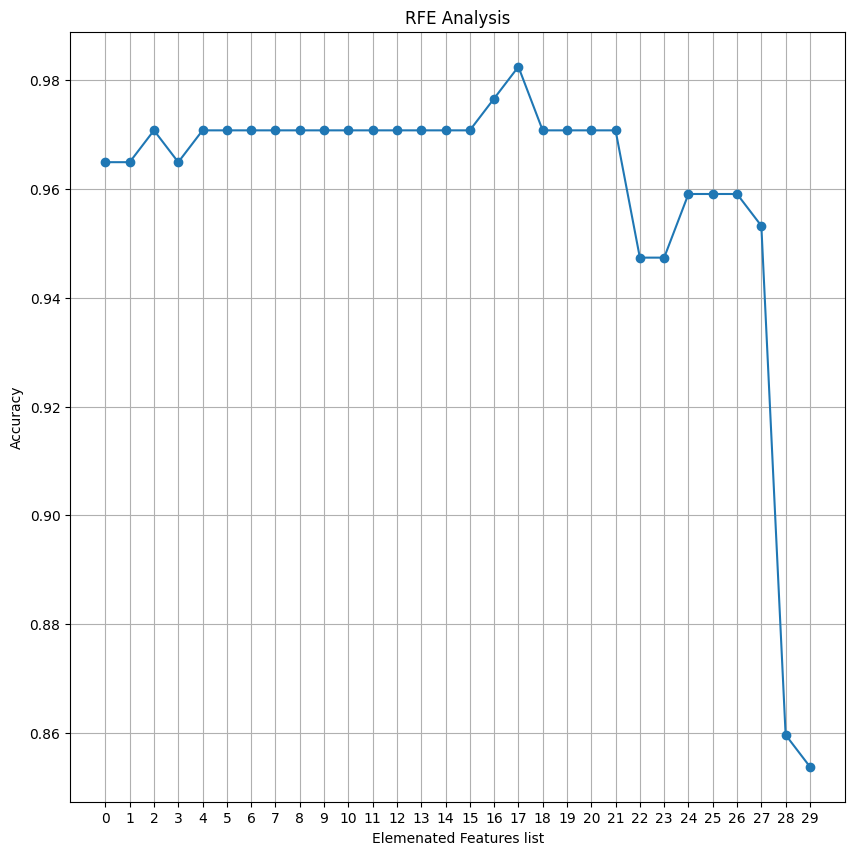

In [334]:
import warnings
warnings.filterwarnings('ignore')


# Initialize the logistic regression model
log_reg_model = LogisticRegression(solver='liblinear',multi_class='ovr')
total_features = X_train.shape[1]

rfe = RFE(log_reg_model,n_features_to_select=total_features)
rfe
rfe.fit(X_train,y_train)
print('Ranking for each feature ',rfe.ranking_)

# Iterate over the number of irrelevant features to eliminate
num_irrelavent_features = np.arange(total_features)

# List to hold accuracy scores
accuracy_list=[]
selected_features_original_rfe =[]

for k in num_irrelavent_features:
    # we need to specify how many features to select and along with that specify model which we wanna use, here we are using Logistic Regression
    # as its classification use case
    rfe = RFE(log_reg_model,n_features_to_select=(total_features-k))
    rfe.fit(X_train,y_train)

    # Get predictions
    y_pred_rfe = rfe.predict(X_test)

    #Get Accuracy
    # In RFE, we calculate accuracy for each iteration so we can identify which iteration features are giving better result
    accuracy = accuracy_score(y_test,y_pred_rfe)
    accuracy_list.append(accuracy)

    # Get the selected features for the current iteration
    selected_features_original_rfe_mask = rfe.support_
    selected_features_original_rfe_list = X.columns[selected_features_original_rfe_mask]
    selected_features_original_rfe.append(selected_features_original_rfe_list.tolist())
    

print(f"accuracy_list is {accuracy_list}")


#selected_features_mask_rfe = rfe.support_
#selected_features_rfe = X.columns[selected_features_mask_rfe]

#print(f"selected_features_rfe are {selected_features_rfe} and total is {len(selected_features_rfe)}" )
#print(f"selected_features_original_rfe are {selected_features_original_rfe} and total is {len(selected_features_original_rfe)}")

for i,feature in enumerate(selected_features_original_rfe):
    print(f"Final features using RFE after elemenating {i} are {feature} and total is {len(feature)}")
    
plt.figure(figsize=(10,10))

plt.plot(num_irrelavent_features,accuracy_list,marker='o')
plt.xlabel("Elemenated Features list")
plt.ylabel("Accuracy")
plt.title("RFE Analysis")
plt.xticks(num_irrelavent_features)
plt.grid(True)
plt.show()

    

# 5. Feature Selection using RFECV (Recursive Feature Elimination Cross Validation) with Random Forest Classifier

##  In RFECV, we pass multiple combination of datasets whereas in RFE we just do single train-test split.
## In RFECV, Based on Cross Validation score, Features will be selected whereas in RFE we need to specify how many features needs to keep or eliminate.
## RFECV is more Robust as it does cross validation.
## In practice, RFECV is often preferred when working with datasets where overfitting is a concern or when you want a more automated approach to selecting features. 

## RFE might still be useful for simpler cases or when you want to control the number of features explicitly

In [5]:
# we use Titanic Dataset from Kaggle for this use case. Ref Dataset in this link: https://www.kaggle.com/c/titanic/data?select=train.csv

from sklearn.feature_selection import RFECV
import pandas as pd

titanic_df = pd.read_csv(r"C:\Users\Venky\Downloads\titanic\train.csv")
display(titanic_df.shape)  # 891 rows and 12 columns
display(titanic_df.head(4))



(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [7]:
# Checking null records

titanic_df.isnull().sum()

# we have missing values in Age and Cabin Columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# Pre Process the data

# Convert Sex,Embarked column data

# Convert Sex column data
if titanic_df['Sex'].dtype == 'object':  # Check if column is of object type (categorical)
    titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

# Convert Embarked column data
if titanic_df['Embarked'].dtype == 'object':  # Check if column is of object type (categorical)
    titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


if titanic_df['Embarked'].notnull().all():
    titanic_df['Embarked'] = titanic_df['Embarked'].astype(int)

display(titanic_df.head(4))

display(titanic_df['Sex'].value_counts())



display(titanic_df['Embarked'].value_counts())

#titanic_df.dtypes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0


0    577
1    314
Name: Sex, dtype: int64

2.0    644
0.0    168
1.0     77
Name: Embarked, dtype: int64

In [13]:
display(titanic_df['Sex'].value_counts())
display(titanic_df['Embarked'].value_counts())
display(titanic_df.shape)

0    577
1    314
Name: Sex, dtype: int64

2.0    644
0.0    168
1.0     77
Name: Embarked, dtype: int64

(891, 12)

In [16]:
# Fill Missing Values
# we had found missing values in Age and Cabin and Embarked column lets fill it will median as these are numerical features
# we are not doing for Cabin column as its not much needed so will drop that column

titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True)


titanic_df['Embarked'].fillna(titanic_df['Embarked'].median(),inplace=True)

In [17]:
# Checking null records

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Drop Irrelavent Features based on Domain Knowledge

In [18]:
titanic_df.drop(columns=['PassengerId','Cabin','Name','Ticket'],inplace=True,axis=1)
titanic_df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0



# Define Feature and Target variables

In [19]:
X = titanic_df.drop(columns=['Survived'],axis=1)
y = titanic_df['Survived']
X.shape,y.shape

((891, 7), (891,))

# Split the dataset into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((712, 7), (179, 7), (712,), (179,))

Total features selected after RFECV 7
best features are Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
Predictions are [0 0 0 1 1]
Actuals are [1 0 0 1 1]
Accuracy is 0.79
confusion matrix is [[89 16]
 [21 53]]
Unique classes: [0 1]


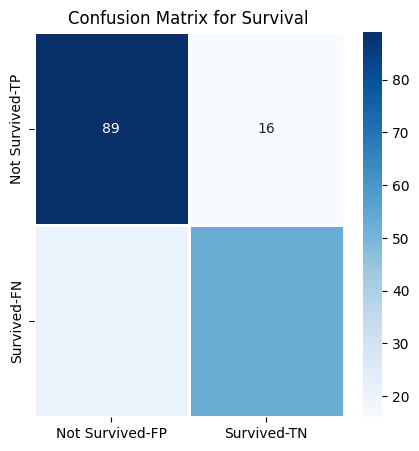

In [59]:
# Initialze the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


log_reg_model = LogisticRegression(solver='liblinear')

# Initialize RFECV

rfecv = RFECV(estimator=log_reg_model,step=1,cv=5,scoring='accuracy') # we are telling to take 5 different combination of samples if cv=5 here

rfecv.fit(X_train,y_train)


# Selected features
print(f"Total features selected after RFECV {rfecv.n_features_}")
features_selected_rfecv = X.columns[rfecv.support_]

print(f"best features are {features_selected_rfecv}")

# Convert y_test to a NumPy array if it's a Series
y_test_array = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test

# Evaluate Model

y_pred_rfecv = rfecv.predict(X_test)
print(f"Predictions are {y_pred_rfecv[:5]}")
print(f"Actuals are {y_test_array[:5]}")

#print(type(y_pred_rfecv))

accuracy_score_rfecv = accuracy_score(y_test_array,y_pred_rfecv)
print(f"Accuracy is {accuracy_score_rfecv:.2f}")

conf = confusion_matrix(y_test_array,y_pred_rfecv)
print(f"confusion matrix is {conf}")

# Assuming y_train or y_test contains the true labels
unique_classes = np.unique(y_test_array)  # Get unique class labels

print("Unique classes:", unique_classes)

# Grid Score
#print(f"Grid score is {rfecv.grid_scores_}")
# Visualize confusion matrix using Seaborn heatmap

plt.figure(figsize=(5,5))
plt.title("Confusion Matrix for Survival")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
sns.heatmap(conf,annot=True,linewidths=1,cmap='Blues',fmt='d',xticklabels=['Not Survived-FP','Survived-TN'],yticklabels=['Not Survived-TP','Survived-FN'])
plt.show()

# Embedded Methods
## Now lets check out Embedded Methods for feature selection

## 6. Variable Importance Feature Selection (From Tree-Based Models)

# 6.a Using Random Forest Classification

feature_importance are [0.08816958 0.26990422 0.24998496 0.04805795 0.03751188 0.27263152
 0.03373988]
sort_indices are [5 1 2 0 3 4 6]
sort_imp are [0.27263152 0.26990422 0.24998496 0.08816958 0.04805795 0.03751188
 0.03373988]
sorted_features are Index(['Fare', 'Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked'], dtype='object')


<BarContainer object of 7 artists>

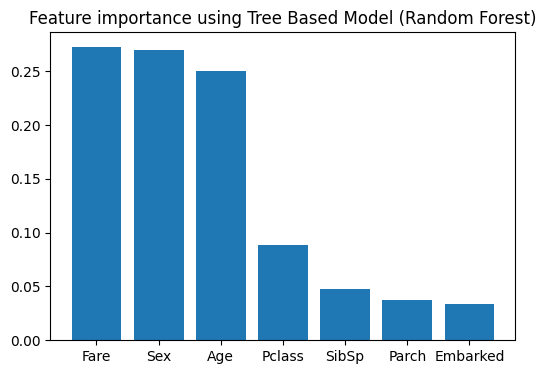

In [87]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rfc_model = RandomForestClassifier(n_estimators=120,random_state=42)
rfc_model.fit(X_train,y_train)
feature_importance = rfc_model.feature_importances_
print(f"feature_importance are {feature_importance}")
sort_indices = np.argsort(feature_importance)[::-1]
print(f"sort_indices are {sort_indices}")

sort_imp = feature_importance[sort_indices]
print(f"sort_imp are {sort_imp}")

sorted_features = X.columns[sort_indices]
print(f"sorted_features are {sorted_features}")


# Now lets visualize with Bar graph

plt.figure(figsize=(6,4))
plt.title("Feature importance using Tree Based Model (Random Forest)") 
plt.bar(range(len(X.columns)),sort_imp,tick_label=sorted_features)


# 6.b Using L1 Regularization (Lasso)

## Penalize less importance features and effectively reducing their influence to Zero. 

In [131]:
from sklearn.linear_model import LassoCV
from sklearn.svm import SVC

lasso_model = LassoCV(cv=5,alphas=np.logspace(-4,1,10)).fit(X_train,y_train) 
# np.logspace(-4,1,10) means it create 10 values evenly on log scale between 10 power of -4 to 10 power of 1.

print(f"alpha is {lasso_model.alpha_:.4f} and Score is {lasso_model.score(X_train,y_train):.4f}")
coefficients = lasso_model.coef_

print(f" Coefficients are {coefficients}")


feature_importance_lasso = pd.DataFrame({'Feature':X.columns,'Coefficients':coefficients})
display(feature_importance_lasso)

# Select features with non-zero coefficients
selected_features_lasso = feature_importance_lasso[feature_importance_lasso['Coefficients'] != 0]

feature_names_lasso = selected_features_lasso['Feature'].values


# Create new feature dataset with selected features of feature_names_lasso

X_train_lasso = X_train[feature_names_lasso]
X_test_lasso = X_test[feature_names_lasso]

# 1. Now lets build Logistic Regression Model with selected features by lasso

log_reg_final_model = LogisticRegression(solver='liblinear').fit(X_train_lasso,y_train)


# Evaluate with test data

lasso_log_reg_score = log_reg_final_model.score(X_test_lasso,y_test)
print(f"lasso_log_reg_score is {lasso_log_reg_score:.4f} and coefficients are {log_reg_final_model.coef_}")
display(log_reg_final_model)


# 2. Now lets build RandomForest Model with selected Features by lasso

rf_final_model = RandomForestClassifier(random_state=42).fit(X_train_lasso,y_train)

# Evaluate with test data
y_pred_rf_lasso = rf_final_model.predict(X_test_lasso)
rf_lasso_accuracy = accuracy_score(y_test,y_pred_rf_lasso)
print(f"rf_lasso_accuracy is {rf_lasso_accuracy:.4f}")
display(rf_final_model)

# 3. Now lets build SVM Model with selected features by lasso 

svm_model_lasso = SVC(kernel='linear',random_state=42).fit(X_train_lasso,y_train)

# Evaluate with test data
y_pred_svm_lasso = svm_model_lasso.predict(X_test_lasso)
svm_lasso_accuracy = accuracy_score(y_test,y_pred_svm_lasso)

print(f"svm_lasso_accuracy is {svm_lasso_accuracy:.4f}")
display(svm_model_lasso)

alpha is 0.0013 and Score is 0.3838
 Coefficients are [-1.51283326e-01  5.08162388e-01 -4.62318318e-03 -3.85399523e-02
 -1.74075092e-02  3.78729375e-04 -3.50584796e-02]


,Feature,Coefficients
0,Pclass,-0.151283
1,Sex,0.508162
2,Age,-0.004623
3,SibSp,-0.038540
4,Parch,-0.017408
5,Fare,0.000379
6,Embarked,-0.035058


lasso_log_reg_score is 0.7933 and coefficients are [[-0.82972959  2.59234422 -0.02591061 -0.28885736 -0.11525476  0.00360647
  -0.18096993]]


LogisticRegression(solver='liblinear')

rf_lasso_accuracy is 0.8156


RandomForestClassifier(random_state=42)

svm_lasso_accuracy is 0.7821


SVC(kernel='linear', random_state=42)